In [7]:
from GG_mthesis import *
import metpy
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
%matplotlib inline

In [8]:
os.getcwd()

'C:\\Users\\gian_\\repos\\mthesis_gianlucca'

transect information:
- initial date and time: 12-04 00:00 aprox.
- end date and time: 12-06 12:00 aprox.

# TSG data

## Data management

In [9]:
ds_TSG = xr.open_dataset('data/03_processed/tsg_ORCHESTRA_return/b1903933_gridded_return.nc')

In [10]:
ds_TSG['distance_cum'] = ds_TSG.distance_cum * units.m

In [21]:
ds_TSG['bx'] = (mpcalc.gradient(ds_TSG.b, axes=['distance_cum']))[0]/2 #creates a tuple, we have to select the first element to get the DataArray (that's why the [0])


In [22]:
ds_TSG

<xarray.Dataset>
Dimensions:                 (distance_cum: 709)
Coordinates:
    lat                     (distance_cum) float64 -57.87 -57.87 ... -55.04
    lon                     (distance_cum) float64 -56.55 -56.56 ... -58.0 -58.0
    depth                   (distance_cum) float64 6.5 6.5 6.5 ... 6.5 6.5 6.5
  * distance_cum            (distance_cum) float64 0.0 500.0 ... 3.54e+05
Data variables: (12/24)
    crs                     (distance_cum) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SDN_EDMO_CODE           (distance_cum) float64 43.0 43.0 43.0 ... 43.0 43.0
    SDN_BOT_DEPTH           (distance_cum) float64 nan nan nan ... nan nan nan
    POSITION_SEADATANET_QC  (distance_cum) float64 49.0 49.0 49.0 ... 49.0 49.0
    DEPTH_SEADATANET_QC     (distance_cum) float64 49.0 49.0 49.0 ... 49.0 49.0
    TIME_SEADATANET_QC      (distance_cum) float64 49.0 49.0 49.0 ... 49.0 49.0
    ...                      ...
    SA                      (distance_cum) float64 33.98 33.97 ... 34.1 34.1
    CT                      (distance_cum) float64 2.632 2.648 ... 7.751 7.755
    rho_pot                 (distance_cum) float64 1.027e+03 ... 1.026e+03
    b                       (distance_cum) float64 0.0002576 ... 0.004972
    bx                      (distance_cum) float64 <Quantity([ 2.80966644e-08...
    bx_abs_log10            float64 7.551
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

## TSG gradient grouping

In [13]:
from scipy import stats
print(stats.describe(np.abs(ds_TSG.bx)))
print(np.percentile(np.log10(np.abs(ds_TSG.bx.metpy.dequantify())), 80))
print(np.percentile(np.log10(np.abs(ds_TSG.bx.metpy.dequantify())), 20))

DescribeResult(nobs=1, minmax=(2.809666443834944e-08, 2.809666443834944e-08), mean=2.809666443834944e-08, variance=nan, skewness=0.0, kurtosis=-3.0)
-7.551345235326358
-7.551345235326358


C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [23]:
ds_TSG['bx_abs_log10'] = -np.log10(np.abs(ds_TSG.bx.metpy.dequantify()))

In [24]:
ds_TSG

<xarray.Dataset>
Dimensions:                 (distance_cum: 709)
Coordinates:
    lat                     (distance_cum) float64 -57.87 -57.87 ... -55.04
    lon                     (distance_cum) float64 -56.55 -56.56 ... -58.0 -58.0
    depth                   (distance_cum) float64 6.5 6.5 6.5 ... 6.5 6.5 6.5
  * distance_cum            (distance_cum) float64 0.0 500.0 ... 3.54e+05
Data variables: (12/24)
    crs                     (distance_cum) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SDN_EDMO_CODE           (distance_cum) float64 43.0 43.0 43.0 ... 43.0 43.0
    SDN_BOT_DEPTH           (distance_cum) float64 nan nan nan ... nan nan nan
    POSITION_SEADATANET_QC  (distance_cum) float64 49.0 49.0 49.0 ... 49.0 49.0
    DEPTH_SEADATANET_QC     (distance_cum) float64 49.0 49.0 49.0 ... 49.0 49.0
    TIME_SEADATANET_QC      (distance_cum) float64 49.0 49.0 49.0 ... 49.0 49.0
    ...                      ...
    SA                      (distance_cum) float64 33.98 33.97 ... 34.1 34.1
    CT                      (distance_cum) float64 2.632 2.648 ... 7.751 7.755
    rho_pot                 (distance_cum) float64 1.027e+03 ... 1.026e+03
    b                       (distance_cum) float64 0.0002576 ... 0.004972
    bx                      (distance_cum) float64 <Quantity([ 2.80966644e-08...
    bx_abs_log10            (distance_cum) float64 7.551 7.806 ... 8.484 8.084
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

In [25]:
cut_bins = [float(np.min(ds_TSG.bx_abs_log10)), float(np.percentile(ds_TSG.bx_abs_log10, 15)), float(np.percentile(ds_TSG.bx_abs_log10, 80)), float(np.max(ds_TSG.bx_abs_log10))]
cut_labels= [2,1,0]
groups = ds_TSG.groupby_bins('bx_abs_log10', bins=cut_bins, labels=cut_labels).groups

In [ ]:
high = ds_TSG.bx_abs_log10[groups[2]].where('bx_abs_log10' == 9999).fillna(2)
middle = ds_TSG.bx_abs_log10[groups[1]].where('bx_abs_log10' == 9999).fillna(1)
low = ds_TSG.bx_abs_log10[groups[0]].where('bx_abs_log10' == 9999).fillna(0)

In [ ]:
bx_cat = xr.concat([high, middle, low], dim='distance_cum').sortby('distance_cum')

## Plots

#### Cruise map

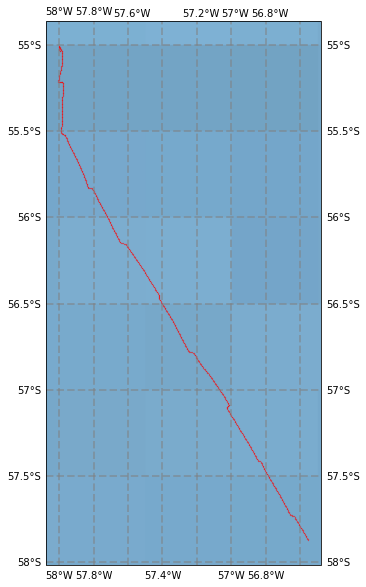

In [ ]:
data.data_sel.cruise_map(ds_TSG.lon,
    ds_TSG.lat, 
    savepath='results/analysis/orchestra_2/cruise_path.png'
    )

#### Line plots

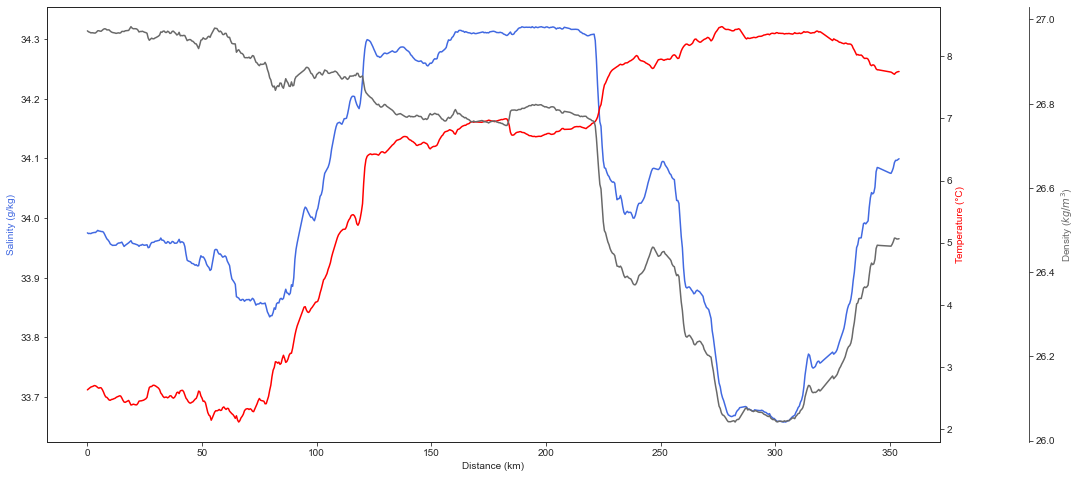

In [ ]:
sns.set_style('ticks')

fig, ax0 = plt.subplots(figsize=(16,8))
fig.subplots_adjust(right=0.9)

ax1 = ax0.twinx()
ax2 = ax0.twinx()

# Offset the right spine of ax2.  The ticks and label have already been
# placed on the right by twinx above.
ax2.spines['right'].set_position(("axes", 1.1))

p1 = sns.lineplot(x=ds_TSG.distance_cum/1000, y=ds_TSG.SA, ax=ax0, color='royalblue')
p2 = sns.lineplot(x=ds_TSG.distance_cum/1000, y=ds_TSG.CT, ax=ax1, color='red')
p3 = sns.lineplot(x=ds_TSG.distance_cum/1000, y=ds_TSG.rho_pot-1000, ax=ax2, color='dimgrey')

ax0.yaxis.label.set_color('royalblue')
ax1.yaxis.label.set_color('red')
ax2.yaxis.label.set_color('dimgrey')

ax0.set(xlabel='Distance (km)', ylabel='Salinity (g/kg)')
ax1.set(ylabel='Temperature (°C)')
ax2.set(ylabel='Density ($kg/m^{3}$)')

fig.savefig('results/analysis/orchestra_2/TSG-T-S-Dens-distance.png', bbox_inches='tight', format='png')

#### TS plots

In [ ]:
ds_TSG

<xarray.Dataset>
Dimensions:                 (distance_cum: 709)
Coordinates:
    lat                     (distance_cum) float64 -57.87 -57.87 ... -55.04
    lon                     (distance_cum) float64 -56.55 -56.56 ... -58.0 -58.0
    depth                   (distance_cum) float64 6.5 6.5 6.5 ... 6.5 6.5 6.5
  * distance_cum            (distance_cum) float64 0.0 500.0 ... 3.54e+05
Data variables: (12/24)
    crs                     (distance_cum) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SDN_EDMO_CODE           (distance_cum) float64 43.0 43.0 43.0 ... 43.0 43.0
    SDN_BOT_DEPTH           (distance_cum) float64 nan nan nan ... nan nan nan
    POSITION_SEADATANET_QC  (distance_cum) float64 49.0 49.0 49.0 ... 49.0 49.0
    DEPTH_SEADATANET_QC     (distance_cum) float64 49.0 49.0 49.0 ... 49.0 49.0
    TIME_SEADATANET_QC      (distance_cum) float64 49.0 49.0 49.0 ... 49.0 49.0
    ...                      ...
    SA                      (distance_cum) float64 33.98 33.97 ... 34.1 34.1
    CT                      (distance_cum) float64 2.632 2.648 ... 7.751 7.755
    rho_pot                 (distance_cum) float64 1.027e+03 ... 1.026e+03
    b                       (distance_cum) float64 0.0002576 ... 0.004972
    bx                      (distance_cum) float64 <Quantity([ 2.80966644e-08...
    bx_abs_log10            (distance_cum) float64 7.551 7.806 ... 8.484 8.084
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

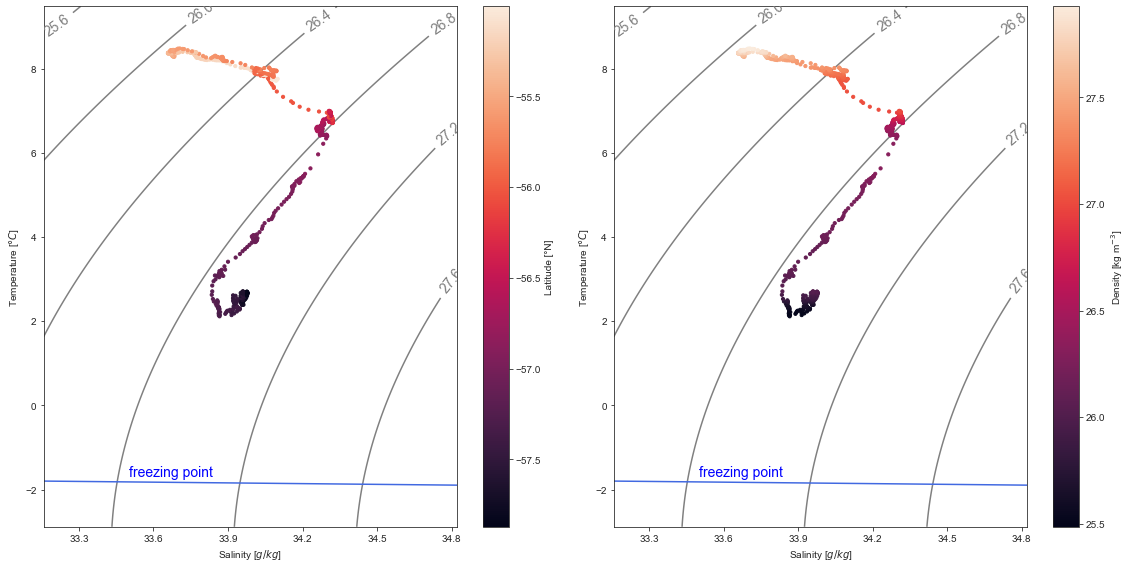

In [ ]:
from matplotlib.ticker import MaxNLocator

df = ds_TSG.to_dataframe()

ts = df[['CT','SA','lat']]

df = ts.sort_values('CT',ascending=True)

mint = np.min(df['CT'])
maxt = np.max(df['CT'])

mins = np.min(df['SA'])
maxs = np.max(df['SA'])

tempL = np.linspace(mint-5,maxt+1,len(df))

salL = np.linspace(mins-0.5,maxs+0.5,len(df))

Tg, Sg = np.meshgrid(tempL,salL)
sigma_theta =gsw.sigma0(Sg,Tg)
cnt = np.linspace(sigma_theta.min(),sigma_theta.max(),len(df))

#-----------------------------------------------------------------------------#

fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(16,8))

#-----------------------------------------------------------------------------#

#ax0
cs = ax0.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1)
cl = plt.clabel(cs, fontsize=14, inline=True, fmt='%.1f')

sc = ax0.scatter(df['SA'], df['CT'], c=df['lat'], s=10)
fp = ax0.plot(salL, gsw.CT_freezing(salL, 0, 0), color='royalblue')
cb = plt.colorbar(sc, ax=ax0)

ax0.set(xlabel='Salinity [$g/kg$]', ylabel='Temperature [$°C$]')
ax0.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax0.yaxis.set_major_locator(MaxNLocator(nbins=8))
ax0.tick_params(direction='out')
#cb.set_label('Density [kg m$^{-3}$]')
cb.set_label('Latitude [°N]')

#-----------------------------------------------------------------------------#

#ax1
cs = ax1.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1)
cl = plt.clabel(cs, fontsize=14, inline=True, fmt='%.1f')

sc = ax1.scatter(df['SA'], df['CT'], c=cnt, s=10)
fp = ax1.plot(salL, gsw.CT_freezing(salL, 0, 0), color='royalblue')
cb = plt.colorbar(sc, ax=ax1)

ax1.set(xlabel='Salinity [$g/kg$]', ylabel='Temperature [$°C$]')
ax1.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=8))
ax1.tick_params(direction='out')
cb.set_label('Density [kg m$^{-3}$]')
#cb.set_label('Latitude [°N]')

#-----------------------------------------------------------------------------#

axes = [ax0,ax1]
for ax in axes: 
    freezestr = '\nfreezing point'
    ax.text(33.5, -1.4, 
    freezestr,
    color='blue', 
    #transform=ax.transAxes, 
    fontsize=14,
    verticalalignment='center')

# SubantSurWatstr = '\nSubantartic Surface Water'
# ax.text(33.97, 4.0,
#     SubantSurWatstr,
#     color='black',
#     fontsize=14,
#     verticalalignment='center',
#     rotation=35)

# AntSurWatstr = '\nAntarctic Surface Water'
# ax.text(34.1, 1.5,
#     AntSurWatstr,
#     color='black',
#     fontsize=14,
#     verticalalignment='center')

#ConShelfWatstr = '\nContinental Shelf Water'
#ax.text(33.9, -0.1,
 #   ConShelfWatstr,
 #   color='black',
 #   fontsize=14,
 #   verticalalignment='center')

plt.tight_layout()

fig.savefig('results/analysis/orchestra_2/TSG-TS-plot.png', bbox_inches='tight', format='png')

#### Bx plots

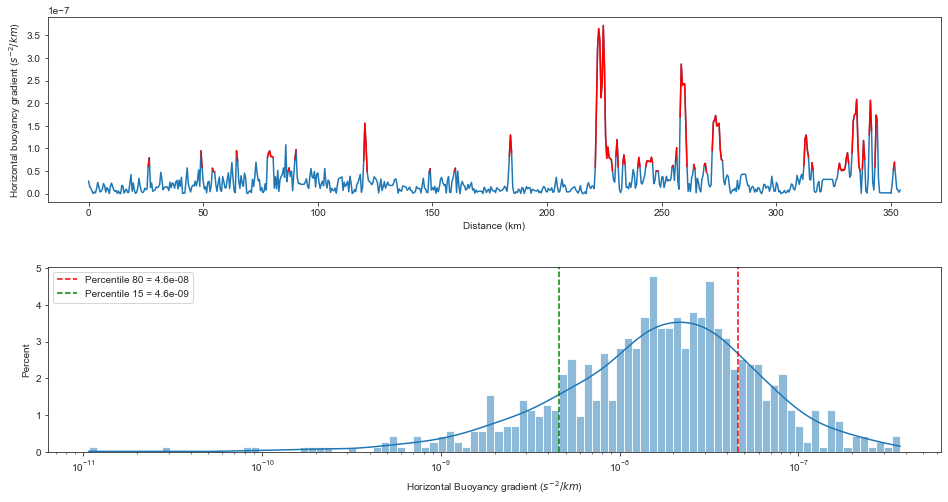

In [28]:
#Let´s plot bx along the track.
fig, (ax0, ax1) = plt.subplots(nrows=2,figsize=(16,8))
plt.subplots_adjust(hspace=0.35)

sns.lineplot(x=ds_TSG.distance_cum/1000, 
    y=np.abs(ds_TSG.bx), 
    ax=ax0, 
    )

aux = ds_TSG.bx.where(np.abs(ds_TSG.bx.metpy.dequantify()) > np.nanpercentile(np.abs(ds_TSG.bx),80), drop=False).metpy.dequantify()
ax0.plot(aux.distance_cum/1000, np.abs(aux),
    color='red')

sns.histplot(data=np.abs(ds_TSG.bx), 
    kde=True, 
    stat='percent', 
    log_scale=True,
    bins=100
    )

ax0.set(xlabel='Distance (km)', ylabel='Horizontal buoyancy gradient ($s^{-2}/km$)')

ax1.set(xlabel='Horizontal Buoyancy gradient ($s^{-2}/km$)')
ax1.axvline(np.nanpercentile(np.abs(ds_TSG.bx),80),
    linestyle='--',
    label=str(('Percentile 80 = ') + str(np.round(np.percentile(np.abs(ds_TSG.bx), 80),10))),
    c='red'
    )
ax1.axvline(np.nanpercentile(np.abs(ds_TSG.bx),15),
    linestyle='--',
    label=str(('Percentile 15 = ') + str(np.round(np.percentile(np.abs(ds_TSG.bx), 15),10)),),
    color='green'
    )

ax1.legend(loc='upper left')

plt.savefig(r'results/analysis/orchestra_2/bx_TSG_with_threshold.png', bbox_inches='tight', format='png')
plt.show()

# SSH

## Data management

In [7]:
#Let's load the dataset with the gradients already calculated.

ds_ssh_SO = xr.open_mfdataset('./data/04_models/geo_fronts/adt_gradient/*.nc')

In [8]:
#Let's have a look at the whole region around the transect, October to December.
ds_ssh_drake = ds_ssh_SO.sel(longitude = slice(-70, -40), latitude = slice(-70,-50)).sel(time=slice('2017-12-04','2017-12-06')).mean('time')

In [9]:
ds_ssh_drake

<xarray.Dataset>
Dimensions:            (latitude: 80, nv: 2, longitude: 120)
Coordinates:
  * latitude           (latitude) float32 -69.88 -69.62 -69.38 ... -50.38 -50.12
  * nv                 (nv) int32 0 1
  * longitude          (longitude) float32 -69.88 -69.62 ... -40.38 -40.12
Data variables: (12/14)
    crs                float64 dask.array<chunksize=(), meta=np.ndarray>
    lat_bnds           (latitude, nv) float32 dask.array<chunksize=(80, 2), meta=np.ndarray>
    lon_bnds           (longitude, nv) float32 dask.array<chunksize=(120, 2), meta=np.ndarray>
    err                (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt                (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    ugos               (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    ...                 ...
    ugosa              (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    vgosa              (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt_calc           (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt_grad_mer       (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt_grad_mer_calc  (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt_grad_radial    (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>

In [32]:
front_loc = model.contour.front_loc(ds_latitude=ds_ssh_drake.latitude,
ds_ssh_grad=ds_ssh_drake.adt_grad_mer,
grad_threshold=np.nanpercentile(np.abs(ds_ssh_drake.adt_grad_mer), 90)*100, 
n_dim=2)

C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


## Plots

#### Histogram

C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


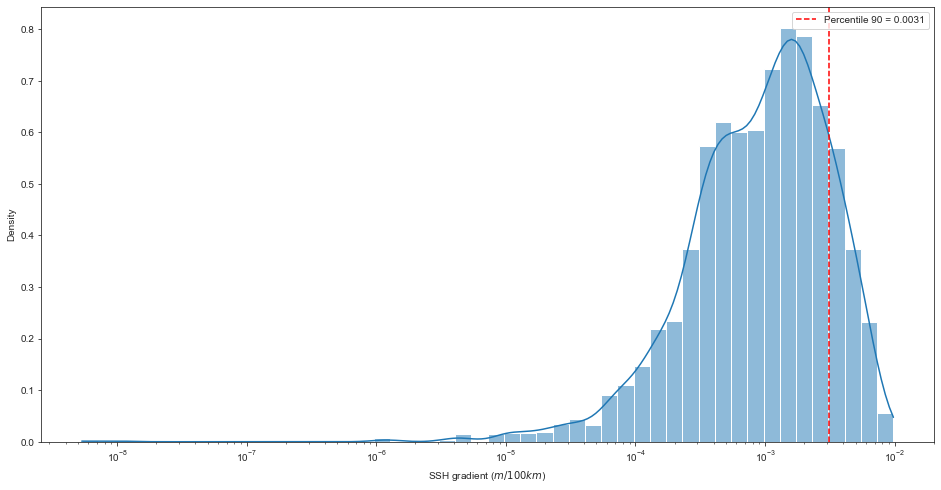

In [33]:
#Let´s plot bx along the track.
fig, ax1 = plt.subplots(figsize=(16,8))

aux = np.array(ds_ssh_drake.adt_grad_mer.dropna(dim='latitude').dropna(dim='longitude').values).flatten()
sns.histplot(data=np.abs(np.array(aux)),
    multiple='stack',
     stat='density',
     kde=True,
     bins=50,
     log_scale=True
     )

ax1.set(xlabel='SSH gradient ($m/100km$)')
ax1.axvline(np.nanpercentile(np.abs(ds_ssh_drake.adt_grad_mer),90),
    linestyle='--',
    label=str(('Percentile 90 = ') + str(np.round(np.nanpercentile(np.abs(ds_ssh_drake.adt_grad_mer), 90),5))),
    color='red'
    )

ax1.legend(loc='upper right')

fig.savefig('results/analysis/orchestra_2/ssh-histogram.png', bbox_inches='tight', format='png')

# ACC fronts

## Sallee fronts

### Data loading function

In [10]:
def load_ACC_fronts(path, date, front_name):
    '''
    front_name (str): one of the following: PF, SAF_N, SAF. Has to go in pair with the corresponding path.
    '''

    from netCDF4 import Dataset
    latitude = Dataset(path).variables[front_name] #extract the latitude from the dataset
    longitude = Dataset(path).variables['longitude'] #extract the longitude from the dataset
    time = Dataset(path).variables['time'] #extract the time from the dataset

    days = (np.datetime64(date) - np.datetime64('1950-01-01')).astype(int) #calculate the numbers of days until your required date (because of time format)
    closest = utils.utils.closest_value(time, days) #closest day in the dataset to the date
    index = np.where(np.array(time) == int(closest)) #index of the day in the dataset

    lat_name = 'latitude_' + front_name #naming of the frontal latitude
    lon_name = 'longitude_' + front_name #naming of the frontal longitude

    globals()[lat_name] = latitude[index][0] #final selection (and globalisation) of the latitude.
    globals()[lon_name] = longitude[index][0] #final selection (and globalisation) of the longitude.

### Plotting

In [11]:
load_ACC_fronts('data/01_raw/SALLEE2008_SO_FRONTS/CTOH_PolarFront_weekly_1993_2018.nc', '2017-12-05', 'PF')
load_ACC_fronts('data/01_raw/SALLEE2008_SO_FRONTS/CTOH_NorthernSubantarcticFront_weekly_1993_2018.nc', '2017-12-05', 'SAF_N')
load_ACC_fronts('data/01_raw/SALLEE2008_SO_FRONTS/CTOH_SubantarcticFront_weekly_1993_2018.nc', '2017-12-05', 'SAF')

C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-package

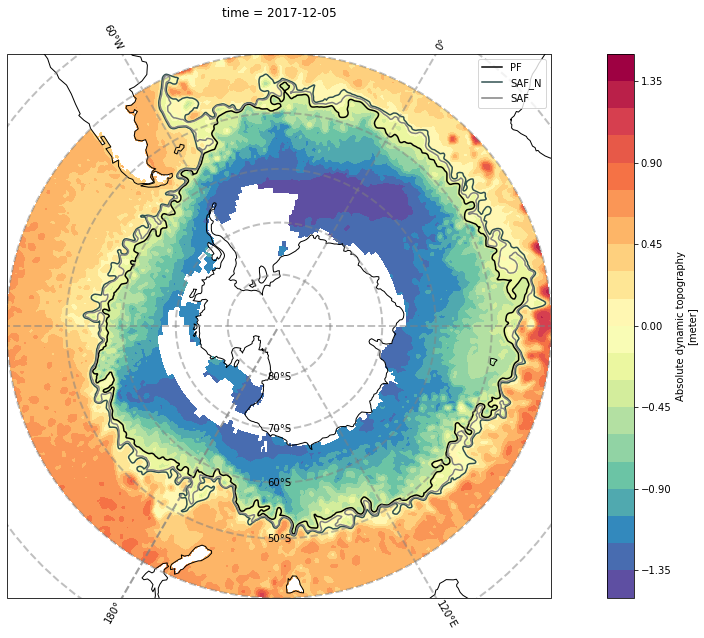

In [12]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-30))

PF = ax.plot(longitude_PF, latitude_PF, transform=ccrs.PlateCarree(), label='PF', color='black')
SAF_N = ax.plot(longitude_SAF_N, latitude_SAF_N,transform=ccrs.PlateCarree(), label='SAF_N', color='darkslategray')
SAF = ax.plot(longitude_SAF, latitude_SAF,transform=ccrs.PlateCarree(), label='SAF', color='gray')

ds_ssh_SO.adt.sel(time='2017-12-05').plot.contourf(
    transform=ccrs.PlateCarree(),
    levels=30,
    cmap='Spectral_r',
    ax=ax)

ax.coastlines()
ax.gridlines(draw_labels=True,
    linewidth=2,
    color='gray',
    alpha=0.5,
    linestyle='--'
    )
plt.legend()

plt.savefig(r'results/analysis/orchestra_2/ACC_contour_Sallee_fronts.png', bbox_inches='tight', format='png')
plt.show()

## Park fronts

### Data loading

In [37]:
ds_ACC_fronts = xr.load_dataset(r'data\03_processed\geo_fronts\park\62985.nc')

### Plotting

In [38]:
ds_ACC_fronts

<xarray.Dataset>
Dimensions:   (ACC_FRONT_NB: 4217, ACC_FRONT_SAF: 4116, ACC_FRONT_PF: 3779, ACC_FRONT_SACCF: 4076, ACC_FRONT_SB: 4253)
Dimensions without coordinates: ACC_FRONT_NB, ACC_FRONT_SAF, ACC_FRONT_PF, ACC_FRONT_SACCF, ACC_FRONT_SB
Data variables:
    LatNB     (ACC_FRONT_NB) float64 -39.84 -39.82 -39.81 ... -39.81 -39.83 nan
    LonNB     (ACC_FRONT_NB) float64 0.0625 0.1875 0.3125 ... -0.0625 nan
    LatSAF    (ACC_FRONT_SAF) float64 -45.23 -45.26 -45.29 ... -45.19 -45.17 nan
    LonSAF    (ACC_FRONT_SAF) float64 0.0625 0.1875 0.3125 ... -0.0625 nan
    LatPF     (ACC_FRONT_PF) float64 -49.64 -49.68 -49.69 ... -49.58 -49.61 nan
    LonPF     (ACC_FRONT_PF) float64 0.0625 0.1875 0.2143 ... -0.0625 nan
    LatSACCF  (ACC_FRONT_SACCF) float64 -52.58 -52.57 -52.58 ... -52.48 nan
    LonSACCF  (ACC_FRONT_SACCF) float64 0.0625 0.1875 0.3125 ... -0.0625 nan
    LatSB     (ACC_FRONT_SB) float64 -54.61 -54.63 -54.61 ... -54.44 -54.4 nan
    LonSB     (ACC_FRONT_SB) float64 0.0625 0.1875 0.3125 ... -0.0625 nan
Attributes: (12/22)
    institution:           Sorbonne University
    data_assembly_center:  LOCEAN, UMR7159, CNRS/Sorbonne University/IRD/MNHN
    authors:               Park, Y.-H.,  Durand, I.
    cdm_data_type:         ACC FRONTS Locations
    comment:               ACC FRONTS Locations constructed from Beta Version...
    Latitude_NB_min:       -56.76267361572425
    ...                    ...
    summary:               ACC FRONTS Locations constructed from Beta Version...
    contact:               yhpark@mnhn.fr, idurand@mnhn.fr
    date_created:          2019-03-29
    id:                    ACC FRONTS Locations
    iso_topic_category:    Physical Oceanography
    license:               CC-BY

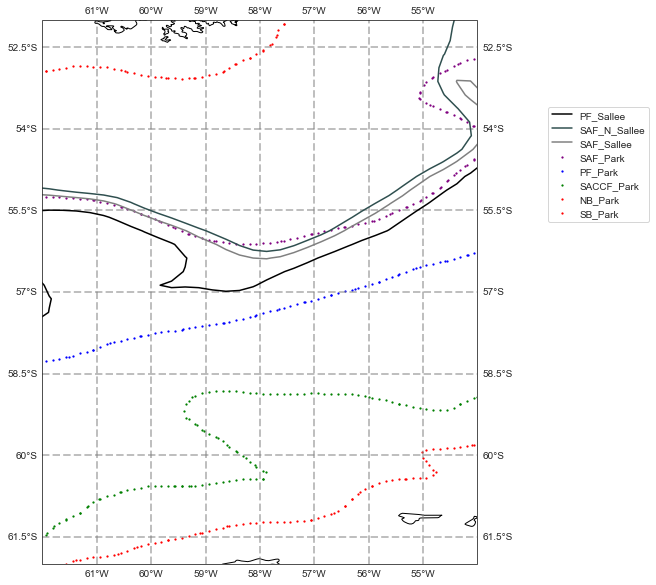

In [39]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-60))

SAF = ax.scatter(ds_ACC_fronts.LonSAF, ds_ACC_fronts.LatSAF,transform=ccrs.PlateCarree(), label='SAF_Park', color='purple', s=1.5)
PF = ax.scatter(ds_ACC_fronts.LonPF, ds_ACC_fronts.LatPF, transform=ccrs.PlateCarree(), label='PF_Park', color='blue', s=1.5)
SACCF = ax.scatter(ds_ACC_fronts.LonSACCF, ds_ACC_fronts.LatSACCF,transform=ccrs.PlateCarree(), label='SACCF_Park', color='green', s=1.5)
NB = ax.scatter(ds_ACC_fronts.LonNB, ds_ACC_fronts.LatNB,transform=ccrs.PlateCarree(), label='NB_Park', color='red', s=1.5)
SB = ax.scatter(ds_ACC_fronts.LonSB, ds_ACC_fronts.LatSB,transform=ccrs.PlateCarree(), label='SB_Park', color='red', s=1.5)

PF = ax.plot(longitude_PF, latitude_PF, transform=ccrs.PlateCarree(), label='PF_Sallee', color='black')
SAF_N = ax.plot(longitude_SAF_N, latitude_SAF_N,transform=ccrs.PlateCarree(), label='SAF_N_Sallee', color='darkslategray')
SAF = ax.plot(longitude_SAF, latitude_SAF,transform=ccrs.PlateCarree(), label='SAF_Sallee', color='gray')

ax.set_extent([-62,-54,-62,-52])

# ds_ssh_SO.adt.sel(time='2017-12-05').plot.contourf(
#     transform=ccrs.PlateCarree(),
#     levels=30,
#     cmap='Spectral_r',
#     ax=ax)

ax.coastlines()
ax.gridlines(draw_labels=True,
    linewidth=2,
    color='gray',
    alpha=0.5,
    linestyle='--'
    )

ax.legend(bbox_to_anchor=(1.15, 0.85))

plt.savefig(r'results/analysis/orchestra_2/fronts_comparison.png', bbox_inches='tight', format='png')
plt.show()

# Regional map

C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


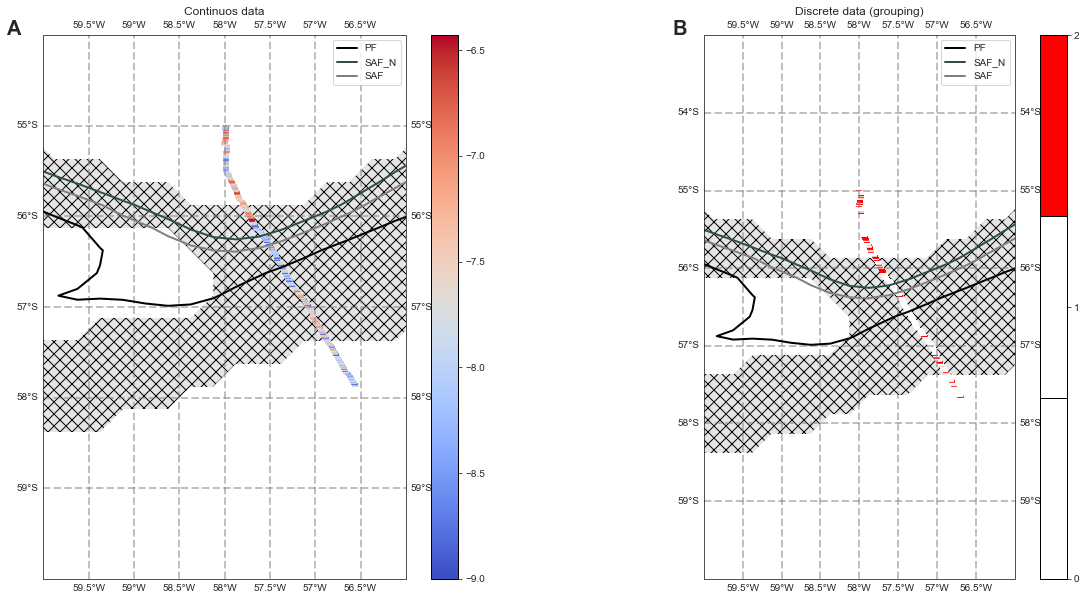

In [40]:
import string

fig =  plt.figure(figsize=(20,10))

ax0 = plt.subplot(1,2,1, projection=ccrs.PlateCarree(central_longitude=0), title='Continuos data')

ax0.text(-0.1, 1, 'A', transform=ax0.transAxes,
    fontsize=20, fontweight='bold')

ax0.contourf(front_loc.longitude, front_loc.latitude, front_loc,
    transform=ccrs.PlateCarree(),
    hatches=['xx'],
    colors='black',
    alpha=0.1,
    add_colorbar=False
    )

TSG = ax0.scatter(ds_TSG.lon, ds_TSG.lat, 
        transform=ccrs.PlateCarree(),
        c=np.log10(np.abs(ds_TSG.bx.metpy.dequantify())),
        cmap='coolwarm',
        vmin=-9,
        marker='_'
        )

PF = ax0.plot(longitude_PF, latitude_PF, transform=ccrs.PlateCarree(), label='PF', color='black', linewidth=2)
SAF_N = ax0.plot(longitude_SAF_N, latitude_SAF_N,transform=ccrs.PlateCarree(), label='SAF_N', color='darkslategray', linewidth=2)
SAF = ax0.plot(longitude_SAF, latitude_SAF,transform=ccrs.PlateCarree(), label='SAF', color='gray', linewidth=2)

GL = ax0.gridlines(crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=2,
    color='gray',
    alpha=0.5,
    linestyle='--')

ax0.set_extent([-60,-56,-60,-54])
ax0.coastlines()

cb = plt.colorbar(TSG, ax=ax0)

cb.outline.set_edgecolor('black')
cb.outline.set_linewidth(1)

cb.dividers.set_color('black')
cb.dividers.set_linewidth(1)

plt.legend()

ax1 = plt.subplot(1,2,2, projection=ccrs.PlateCarree(central_longitude=0), title='Discrete data (grouping)')

ax1.text(-0.1, 1, 'B', transform=ax1.transAxes,
    fontsize=20, fontweight='bold')

ax1.contourf(front_loc.longitude, front_loc.latitude, front_loc,
    transform=ccrs.PlateCarree(),
    hatches=['xx'],
    colors='black',
    alpha=0.1,
    add_colorbar=False
    )

from matplotlib import colors
cmap =colors.ListedColormap(['white','white','red'])
bounds=[0,1,2]
TSG = ax1.scatter(ds_TSG.lon[0:-1], ds_TSG.lat[0:-1], 
        transform=ccrs.PlateCarree(),
        c=bx_cat,
        cmap=cmap,
        vmin=0,
        vmax=2,
        marker='_'
        )

PF = ax1.plot(longitude_PF, latitude_PF, transform=ccrs.PlateCarree(), label='PF', color='black', linewidth=2)
SAF_N = ax1.plot(longitude_SAF_N, latitude_SAF_N,transform=ccrs.PlateCarree(), label='SAF_N', color='darkslategray', linewidth=2)
SAF = ax1.plot(longitude_SAF, latitude_SAF,transform=ccrs.PlateCarree(), label='SAF', color='gray', linewidth=2)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=2,
    color='gray',
    alpha=0.5,
    linestyle='--')

ax1.set_extent([-60,-56,-60,-53])
ax1.coastlines('10m')

cb = plt.colorbar(TSG,
        ax=ax1,
        ticks=[0, 1, 2],
        drawedges=True)

plt.legend()

cb.outline.set_edgecolor('black')
cb.outline.set_linewidth(1)

cb.dividers.set_color('black')
cb.dividers.set_linewidth(1)

plt.legend(loc='upper right')

plt.savefig(r'results/analysis/orchestra_2/TSG_region_mixed_data-04-06-dec-mean.png', bbox_inches='tight', format='png')
plt.show()

# EKE

In [41]:
ds_ssh_drake_summer = ds_ssh_SO.sel(longitude = slice(-70, -40), latitude = slice(-70,-50)).sel(time=slice('2017-10-01','2017-12-31'))

In [42]:
ds_ssh_drake_summer

<xarray.Dataset>
Dimensions:            (time: 92, latitude: 80, nv: 2, longitude: 120)
Coordinates:
  * time               (time) datetime64[ns] 2017-10-01 ... 2017-12-31
  * latitude           (latitude) float32 -69.88 -69.62 -69.38 ... -50.38 -50.12
  * nv                 (nv) int32 0 1
  * longitude          (longitude) float32 -69.88 -69.62 ... -40.38 -40.12
Data variables: (12/14)
    crs                (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    lat_bnds           (time, latitude, nv) float32 dask.array<chunksize=(1, 80, 2), meta=np.ndarray>
    lon_bnds           (time, longitude, nv) float32 dask.array<chunksize=(1, 120, 2), meta=np.ndarray>
    err                (time, latitude, longitude) float64 dask.array<chunksize=(1, 80, 120), meta=np.ndarray>
    adt                (time, latitude, longitude) float64 dask.array<chunksize=(1, 80, 120), meta=np.ndarray>
    ugos               (time, latitude, longitude) float64 dask.array<chunksize=(1, 80, 120), meta=np.ndarray>
    ...                 ...
    ugosa              (time, latitude, longitude) float64 dask.array<chunksize=(1, 80, 120), meta=np.ndarray>
    vgosa              (time, latitude, longitude) float64 dask.array<chunksize=(1, 80, 120), meta=np.ndarray>
    adt_calc           (time, latitude, longitude) float64 dask.array<chunksize=(1, 80, 120), meta=np.ndarray>
    adt_grad_mer       (time, latitude, longitude) float64 dask.array<chunksize=(1, 80, 120), meta=np.ndarray>
    adt_grad_mer_calc  (time, latitude, longitude) float64 dask.array<chunksize=(1, 80, 120), meta=np.ndarray>
    adt_grad_radial    (time, latitude, longitude) float64 dask.array<chunksize=(1, 80, 120), meta=np.ndarray>

### Plotting functions

In [43]:
def draw_box(ax,x0,x1,y0,y1,color='red',linewidth=1.5,linestyle='-'):

    ax.plot([x0,x1],[y0,y0],
        color=color,
        linewidth=linewidth,
        linestyle=linestyle
        )

    ax.plot([x0,x1],[y1,y1],
        color=color,
        linewidth=linewidth,
        linestyle=linestyle
        )

    ax.plot([x0,x0],[y0,y1],
        color=color,
        linewidth=linewidth,
        linestyle=linestyle
        )

    ax.plot([x1,x1],[y0,y1],
        color=color,
        linewidth=linewidth,
        linestyle=linestyle
        )

In [44]:
def plot_geostrophic_velocities(ds,
    transect_lon, transect_lat, 
    box_x0, box_x1, box_y0, box_y1, 
    savepath,
    extent=[-70,-40,-70,-50],
    plot1_title = 'Figure 1', plot2_title = 'Figure 2',
    lon_var_name='longitude', lat_var_name='latitude',
    ADT_var_name='adt', ugos_var_name='ugos', vgos_var_name='vgos',
    sla_var_name='sla', ugosa_var_name='ugosa', vgosa_var_name='vgosa'):
    
    '''
    '''

#-----------------------------------------------------------------------------#

#   Imports

    from matplotlib.gridspec import GridSpec
    import cartopy.feature as cfeature

#-----------------------------------------------------------------------------#

#   Box boundaries

    if box_x0 < 0:
        box_x0_aux = box_x0 - 0.2
    else:
        box_x0_aux = box_x0 + 0.2
    
    if box_x1 < 0:
        box_x1_aux = box_x1 + 0.2
    else:
        box_x1_aux = box_x1 - 0.2

    box_y0_aux = box_y0 - 0.2
    box_y1_aux = box_y1 + 0.2

    ds_ssh_box = ds.sel(longitude = slice(box_x0_aux, box_x1_aux), latitude = slice(box_y0_aux, box_y1_aux))

#-----------------------------------------------------------------------------#

#   Figure creation

    fig = plt.figure(figsize=(10,20))
    gs = GridSpec(nrows=2, ncols=1, hspace=0.1, wspace=0.1)

#-----------------------------------------------------------------------------#

#   Plot 1:

    ax0 = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=0))
#------------#
    ax0.set_extent(extent)

    adt0 = ax0.contourf(
        ds[lon_var_name],
        ds[lat_var_name],
        ds[ADT_var_name],
        cmap='Spectral_r',
        levels=30)

    gl0 = ax0.gridlines(crs=ccrs.PlateCarree(), 
        draw_labels=True,
        linewidth=2,
        color='gray',
        alpha=0.5,
        linestyle='--')

    x = np.array(ds[lon_var_name])
    y = np.array(ds[lat_var_name])
    u = np.array(ds[ugos_var_name])
    v = np.array(ds[vgos_var_name])

    magnitude = np.sqrt(u**2 + v**2)
    #magnitude_norm = (magnitude - np.nanmin(magnitude))/(np.nanmax(magnitude) - np.nanmin(magnitude))

    quiv0 = ax0.quiver(x, y, u, v, 
        #magnitude,
        #cmap='autumn_r'
        )

    ax0.plot(
        transect_lon,
        transect_lat,
        c='purple',
        linewidth=2
    )

    PF = ax0.plot(longitude_PF, latitude_PF, transform=ccrs.PlateCarree(), label='PF', linewidth=2, color='black')
    SAF_N = ax0.plot(longitude_SAF_N, latitude_SAF_N,transform=ccrs.PlateCarree(), label='SAF_N', linewidth=2, color='darkgray')
    SAF = ax0.plot(longitude_SAF, latitude_SAF,transform=ccrs.PlateCarree(), label='SAF', linewidth=2, color='white')

    ax0.legend(loc='upper left')

    plt.colorbar(adt0, 
        ax=ax0,
        label = 'Absolute dynamic topography [m]',
        orientation='horizontal',
        pad=0.05    
        )

    ax0.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
    ax0.coastlines()

    ax0.set_title(plot1_title)
#------------#
    #regional box
    draw_box(ax0,box_x0,box_x1,box_y0,box_y1)

    ax1 = fig.add_axes([0.75, 0.48, 0.3, 0.5], projection=ccrs.PlateCarree(central_longitude=0))
    ax1.set_extent([box_x0,box_x1,box_y0,box_y1])

    adt1 = ax1.contourf(
        ds_ssh_box[lon_var_name],
        ds_ssh_box[lat_var_name],
        ds_ssh_box[ADT_var_name],
        cmap='Spectral_r',
        levels=30)

    gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), 
        draw_labels=True,
        linewidth=2,
        color='gray',
        alpha=0.5,
        linestyle='--')
    gl1.top_labels=False
    gl1.left_labels=False

    x_box = np.array(ds_ssh_box[lon_var_name])
    y_box = np.array(ds_ssh_box[lat_var_name])
    u_box = np.array(ds_ssh_box[ugos_var_name])
    v_box = np.array(ds_ssh_box[vgos_var_name])

    quiv1 = ax1.quiver(x_box, y_box, u_box, v_box,
        color='black',
        scale=1.5,
        #linewidth=1.5,
        )

    from matplotlib import colors
    cmap =colors.ListedColormap(['white','white','red'])
    bounds=[0,1,2]
    TSG = ax1.scatter(ds_TSG.lon[0:-1], ds_TSG.lat[0:-1], 
            transform=ccrs.PlateCarree(),
            c=bx_cat,
            cmap=cmap,
            vmin=0,
            vmax=2,
            marker='_',
            zorder=10
            )

    PF = ax1.plot(longitude_PF, latitude_PF, transform=ccrs.PlateCarree(), label='PF', linewidth=2, color='black')
    SAF_N = ax1.plot(longitude_SAF_N, latitude_SAF_N,transform=ccrs.PlateCarree(), label='SAF_N', linewidth=2, color='darkgray')
    SAF = ax1.plot(longitude_SAF, latitude_SAF,transform=ccrs.PlateCarree(), label='SAF', linewidth=2, color='white')

    cb3 = plt.colorbar(adt1, 
    ax=ax1,
    orientation='vertical',
    fraction=0.055,
    pad=0.20    
    )

    ax1.outline_patch.set_edgecolor('red')
    ax1.outline_patch.set_linestyle('-')
    ax1.outline_patch.set_linewidth(1)

#-----------------------------------------------------------------------------#

#   Plot 2:

    ax2 = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=0))
#------------#
    ax2.set_extent(extent)

    sla2 = ax2.contourf(
        ds[lon_var_name],
        ds[lat_var_name],
        ds[sla_var_name],
        cmap='Spectral_r',
        levels=30)

    gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), 
        draw_labels=True,
        linewidth=2,
        color='gray',
        alpha=0.5,
        linestyle='--')

    x_a = np.array(ds[lon_var_name])
    y_a = np.array(ds[lat_var_name])
    u_a = np.array(ds[ugosa_var_name])
    v_a = np.array(ds[vgosa_var_name])

    magnitude_a = np.sqrt(u_a**2 + v_a**2)
    magnitude_a_norm = (magnitude - np.nanmin(magnitude_a))/(np.nanmax(magnitude_a) - np.nanmin(magnitude_a))

    quiv2 = ax2.quiver(x_a, y_a, u_a, v_a, 
        #magnitude_a,
        #cmap='autumn_r'
        )

    ax2.plot(
        transect_lon,
        transect_lat,
        c='purple',
        linewidth=2
    )

    PF = ax2.plot(longitude_PF, latitude_PF, transform=ccrs.PlateCarree(), label='PF', linewidth=2, color='black')
    SAF_N = ax2.plot(longitude_SAF_N, latitude_SAF_N,transform=ccrs.PlateCarree(), label='SAF_N', linewidth=2, color='darkgray')
    SAF = ax2.plot(longitude_SAF, latitude_SAF,transform=ccrs.PlateCarree(), label='SAF', linewidth=2, color='white')

    ax2.legend(loc='upper left')

    plt.colorbar(sla2, 
        ax=ax2,
        label = 'Sea Level Anomaly [m]',
        orientation='horizontal',
        pad=0.05)

    ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
    ax2.coastlines()

    ax2.set_title(plot2_title)
#------------#
    #regional box
    draw_box(ax2,box_x0,box_x1,box_y0,box_y1)

    ax3 = fig.add_axes([0.75, 0.085, 0.3, 0.5], projection=ccrs.PlateCarree(central_longitude=0))
    ax3.set_extent([box_x0,box_x1,box_y0,box_y1])

    sla3 = ax3.contourf(
        ds_ssh_box[lon_var_name],
        ds_ssh_box[lat_var_name],
        ds_ssh_box[sla_var_name],
        cmap='Spectral_r',
        levels=30)

    gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), 
        draw_labels=True,
        linewidth=2,
        color='gray',
        alpha=0.5,
        linestyle='--')
    gl3.top_labels=False
    gl3.left_labels=False

    x_a_box = np.array(ds_ssh_box[lon_var_name])
    y_a_box = np.array(ds_ssh_box[lat_var_name])
    u_a_box = np.array(ds_ssh_box[ugosa_var_name])
    v_a_box = np.array(ds_ssh_box[vgosa_var_name])

    quiv3 = ax3.quiver(x_a_box, y_a_box, u_a_box, v_a_box,
        color='black',
        scale=1.5,
        #linewidth=1.5,
        )

    from matplotlib import colors
    cmap =colors.ListedColormap(['white','white','red'])
    bounds=[0,1,2]
    TSG = ax3.scatter(ds_TSG.lon[0:-1], ds_TSG.lat[0:-1], 
            transform=ccrs.PlateCarree(),
            c=bx_cat,
            cmap=cmap,
            vmin=0,
            vmax=2,
            marker='_',
            zorder=10
            )

    PF = ax3.plot(longitude_PF, latitude_PF, transform=ccrs.PlateCarree(), label='PF', linewidth=2, color='black')
    SAF_N = ax3.plot(longitude_SAF_N, latitude_SAF_N,transform=ccrs.PlateCarree(), label='SAF_N', linewidth=2, color='darkgray')
    SAF = ax3.plot(longitude_SAF, latitude_SAF,transform=ccrs.PlateCarree(), label='SAF', linewidth=2, color='white')

    cb3 = plt.colorbar(sla3, 
    ax=ax3,
    orientation='vertical',
    fraction=0.055,
    pad=0.20    
    )

    ax3.outline_patch.set_edgecolor('red')
    ax3.outline_patch.set_linestyle('-')
    ax3.outline_patch.set_linewidth(1)

#-----------------------------------------------------------------------------#

    plt.savefig(savepath, bbox_inches='tight', format='png')
    plt.show()

In [45]:
def plot_KE(ds, 
    transect_lon, transect_lat, 
    box_x0, box_x1, box_y0, box_y1, 
    savepath, 
    extent=[-70,-40,-70,-50],
    plot1_title = 'Figure 1', plot2_title = 'Figure 2',
    lon_var_name='longitude', lat_var_name='latitude', KE_var_name='KE', EKE_var_name='EKE'):
    
    '''
    '''
    
#-----------------------------------------------------------------------------#

#   Imports
    
    from matplotlib.gridspec import GridSpec
    import cartopy.feature as cfeature
    import cmocean as cmocean

#-----------------------------------------------------------------------------#

#   Box boundaries

    if box_x0 < 0:
        box_x0_aux = box_x0 - 0.2
    else:
        box_x0_aux = box_x0 + 0.2
    
    if box_x1 < 0:
        box_x1_aux = box_x1 + 0.2
    else:
        box_x1_aux = box_x1 - 0.2

    box_y0_aux = box_y0 - 0.2
    box_y1_aux = box_y1 + 0.2

    ds_ssh_box = ds.sel(longitude = slice(box_x0_aux, box_x1_aux), latitude = slice(box_y0_aux, box_y1_aux))

#-----------------------------------------------------------------------------#

#   Figure creation

    fig = plt.figure(figsize=(10,20))
    gs = GridSpec(nrows=2, ncols=1, hspace=0.1, wspace=0.1)

#-----------------------------------------------------------------------------#

#   Plot 1: Total KE
    ax0 = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=0))
#------------#
    ax0.set_extent(extent)

    ke0 = ax0.contourf(
        ds[lon_var_name],
        ds[lat_var_name],
        ds[KE_var_name],
        cmap='Spectral_r',
        vmin=np.min(ds[KE_var_name]),
        vmax=np.max(ds[KE_var_name]),
        levels=30)

    gl0 = ax0.gridlines(crs=ccrs.PlateCarree(), 
        draw_labels=True,
        linewidth=2,
        color='gray',
        alpha=0.5,
        linestyle='--'
        )

    ax0.plot(
        transect_lon,
        transect_lat,
        c='purple',
        linewidth=2
        )

    PF = ax0.plot(longitude_PF, latitude_PF, transform=ccrs.PlateCarree(), label='PF', linewidth=2, color='black')
    SAF_N = ax0.plot(longitude_SAF_N, latitude_SAF_N,transform=ccrs.PlateCarree(), label='SAF_N', linewidth=2, color='darkgray')
    SAF = ax0.plot(longitude_SAF, latitude_SAF,transform=ccrs.PlateCarree(), label='SAF', linewidth=2, color='white')

    ax0.legend(loc='upper left')

    cb0 = plt.colorbar(ke0, 
        ax=ax0,
        label = 'Total Kinetic Energy [$cm^{2}/s^{2}$]',
        orientation='horizontal',
        pad=0.05    
        )

    ax0.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
    ax0.coastlines()

    ax0.set_title(plot1_title)
#------------#
    # Regional box
    draw_box(ax0,box_x0,box_x1,box_y0,box_y1)

    ax1 = fig.add_axes([0.75, 0.48, 0.3, 0.5], projection=ccrs.PlateCarree(central_longitude=0))
    ax1.set_extent([box_x0,box_x1,box_y0,box_y1])

    ke1 = ax1.contourf(
        ds_ssh_box[lon_var_name],
        ds_ssh_box[lat_var_name],
        ds_ssh_box[KE_var_name],
        cmap=cmocean.cm.balance,
        vmin = np.min(ds_ssh_box[KE_var_name]),
        vmax = np.max(ds_ssh_box[KE_var_name]),
        levels=30
        )

    gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), 
        draw_labels=True,
        linewidth=2,
        color='gray',
        alpha=0.5,
        linestyle='--'
        )
    gl1.top_labels=False
    gl1.left_labels=False

    from matplotlib import colors
    cmap =colors.ListedColormap(['white','white','red'])
    bounds=[0,1,2]
    TSG = ax1.scatter(ds_TSG.lon[0:-1], ds_TSG.lat[0:-1], 
            transform=ccrs.PlateCarree(),
            c=bx_cat,
            cmap=cmap,
            vmin=0,
            vmax=2,
            marker='_',
            zorder=10
            )

    PF = ax1.plot(longitude_PF, latitude_PF, transform=ccrs.PlateCarree(), label='PF', linewidth=2, color='black')
    SAF_N = ax1.plot(longitude_SAF_N, latitude_SAF_N,transform=ccrs.PlateCarree(), label='SAF_N', linewidth=2, color='darkgray')
    SAF = ax1.plot(longitude_SAF, latitude_SAF,transform=ccrs.PlateCarree(), label='SAF', linewidth=2, color='white')

    cb1 = plt.colorbar(ke1, 
        ax=ax1,
        orientation='vertical',
        fraction=0.055,
        pad=0.20    
        )

    ax1.outline_patch.set_edgecolor('red')
    ax1.outline_patch.set_linestyle('-')
    ax1.outline_patch.set_linewidth(1)

#-----------------------------------------------------------------------------#

#   Plot 2:

    ax2 = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=0))
#------------#
    ax2.set_extent(extent)

    eke2 = ax2.contourf(
        ds[lon_var_name],
        ds[lat_var_name],
        ds[EKE_var_name],
        cmap='Spectral_r',
        levels=30
        )

    gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), 
        draw_labels=True,
        linewidth=2,
        color='gray',
        alpha=0.5,
        linestyle='--'
        )

    ax2.plot(
        transect_lon,
        transect_lat,
        c='purple',
        linewidth=2
    )

    PF = ax2.plot(longitude_PF, latitude_PF, transform=ccrs.PlateCarree(), label='PF', linewidth=2, color='black')
    SAF_N = ax2.plot(longitude_SAF_N, latitude_SAF_N,transform=ccrs.PlateCarree(), label='SAF_N', linewidth=2, color='darkgray')
    SAF = ax2.plot(longitude_SAF, latitude_SAF,transform=ccrs.PlateCarree(), label='SAF', linewidth=2, color='white')

    ax2.legend(loc='upper left')

    plt.colorbar(eke2, 
        ax=ax2,
        label = 'Eddy Kinetic Energy [$cm^{2}/s^{2}$]',
        orientation='horizontal',
        pad=0.05)

    ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
    ax2.coastlines()

    ax2.set_title(plot2_title)
#------------#
    #regional box
    draw_box(ax2,box_x0,box_x1,box_y0,box_y1)

    ax3 = fig.add_axes([0.75, 0.085, 0.3, 0.5], projection=ccrs.PlateCarree(central_longitude=0))
    ax3.set_extent([box_x0,box_x1,box_y0,box_y1])

    eke3 = ax3.contourf(
        ds_ssh_box[lon_var_name],
        ds_ssh_box[lat_var_name],
        ds_ssh_box[EKE_var_name],
        cmap=cmocean.cm.balance,
        vmin = np.min(ds_ssh_box[EKE_var_name]),
        vmax = np.max(ds_ssh_box[EKE_var_name]),
        levels=30
        )

    gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), 
        draw_labels=True,
        linewidth=2,
        color='gray',
        alpha=0.5,
        linestyle='--')
    gl3.top_labels=False
    gl3.left_labels=False

    from matplotlib import colors
    cmap =colors.ListedColormap(['white','white','red'])
    bounds=[0,1,2]
    TSG = ax3.scatter(ds_TSG.lon[0:-1], ds_TSG.lat[0:-1], 
            transform=ccrs.PlateCarree(),
            c=bx_cat,
            cmap=cmap,
            vmin=0,
            vmax=2,
            marker='_',
            zorder=10
            )

    PF = ax3.plot(longitude_PF, latitude_PF, transform=ccrs.PlateCarree(), label='PF', linewidth=2, color='black')
    SAF_N = ax3.plot(longitude_SAF_N, latitude_SAF_N,transform=ccrs.PlateCarree(), label='SAF_N', linewidth=2, color='darkgray')
    SAF = ax3.plot(longitude_SAF, latitude_SAF,transform=ccrs.PlateCarree(), label='SAF', linewidth=2, color='white')

    cb3 = plt.colorbar(eke3, 
        ax=ax3,
        orientation='vertical',
        fraction=0.055,
        pad=0.20    
        )

    ax3.outline_patch.set_edgecolor('red')
    ax3.outline_patch.set_linestyle('-')
    ax3.outline_patch.set_linewidth(1)


#-----------------------------------------------------------------------------#

    plt.savefig(savepath, bbox_inches='tight', format='png')
    plt.show()

## Long term reference

In [46]:
ds_ssh_drake_cruisemean = ds_ssh_drake_summer.sel(time=slice('2017-12-04','2017-12-06')).mean('time')

### Geostrophic velocity plots

## 3 months reference

### KE Calculations (reference change included)

In [47]:
ds_ssh_drake

<xarray.Dataset>
Dimensions:            (latitude: 80, nv: 2, longitude: 120)
Coordinates:
  * latitude           (latitude) float32 -69.88 -69.62 -69.38 ... -50.38 -50.12
  * nv                 (nv) int32 0 1
  * longitude          (longitude) float32 -69.88 -69.62 ... -40.38 -40.12
Data variables: (12/14)
    crs                float64 dask.array<chunksize=(), meta=np.ndarray>
    lat_bnds           (latitude, nv) float32 dask.array<chunksize=(80, 2), meta=np.ndarray>
    lon_bnds           (longitude, nv) float32 dask.array<chunksize=(120, 2), meta=np.ndarray>
    err                (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt                (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    ugos               (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    ...                 ...
    ugosa              (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    vgosa              (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt_calc           (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt_grad_mer       (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt_grad_mer_calc  (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt_grad_radial    (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>

Equations:

$U = <u> + u'$

$V = <v> + v'$

From that:

$u' = U - <u>$

$v' = V - <v>$

If we consider that:

$U = ugos , V = vgos$  --> daily total geostrophic velocities

$<u>_{3months} , <v>_{3months}$ --> mean geostrophic velocities

Then:

$u' = ugos - <u>_{3months}$

$v' = vgos - <v>_{3months}$

In [48]:
# Calculating <u>_{3months} , <v>_{3months}
u_3months = ds_ssh_drake_summer.ugos.sel(time=slice('2017-10-01','2017-12-31')).mean('time',keep_attrs=True)
v_3months = ds_ssh_drake_summer.vgos.sel(time=slice('2017-10-01','2017-12-31')).mean('time',keep_attrs=True)

In [49]:
ds_ssh_drake_summer['u_a'] = ds_ssh_drake.ugos - u_3months
ds_ssh_drake_summer['v_a'] = ds_ssh_drake.vgos - v_3months

From here we can calculate the EKE as: 

$EKE = \frac{(u')^2 +(v')^2}{2}$

And KE:

$KE = \frac{(U)^2 +(V)^2}{2}$

In [50]:
ds_ssh_drake_summer['EKE'] = (ds_ssh_drake_summer.u_a**2 + ds_ssh_drake_summer.v_a**2)/2
ds_ssh_drake_summer['KE'] = (ds_ssh_drake_summer.ugos**2 + ds_ssh_drake_summer.vgos**2)/2

### Geostrophic velocity plots

In [51]:
ds_ssh_drake_cruisemean = ds_ssh_drake_summer.sel(time=slice('2017-12-04','2017-12-06')).mean('time')

C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\gian_\AppData\Local\Temp/ipykernel_12696/650105179.py:164: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_edgecolor('red')
C:\Users\gian_\AppData\Local\Temp/ipykernel_12696/650105179.py:165: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_linestyle('-')
C:\Users\gian_\AppData\Local\Temp/ipykernel_12696/650105179.py:166: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes prop

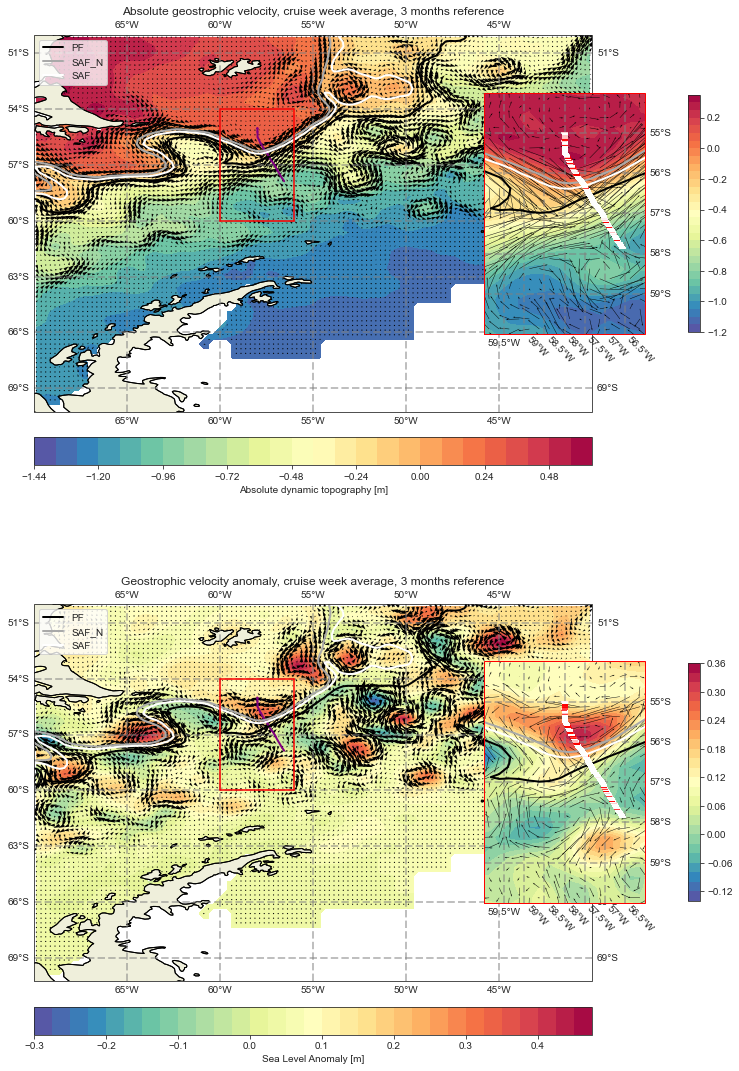

In [52]:
plot_geostrophic_velocities(ds_ssh_drake_cruisemean, ds_TSG.lon, ds_TSG.lat,
     -60,-56,-60,-54, 
     savepath= 'results/analysis/orchestra_2/Ugos-a_cruise-mean_3months-reference.png',
     plot1_title='Absolute geostrophic velocity, cruise week average, 3 months reference', 
     plot2_title='Geostrophic velocity anomaly, cruise week average, 3 months reference',
     ugosa_var_name='u_a', vgosa_var_name='v_a')

### KE plots

C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\gian_\AppData\Local\Temp/ipykernel_12696/3451301345.py:145: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_edgecolor('red')
C:\Users\gian_\AppData\Local\Temp/ipykernel_12696/3451301345.py:14

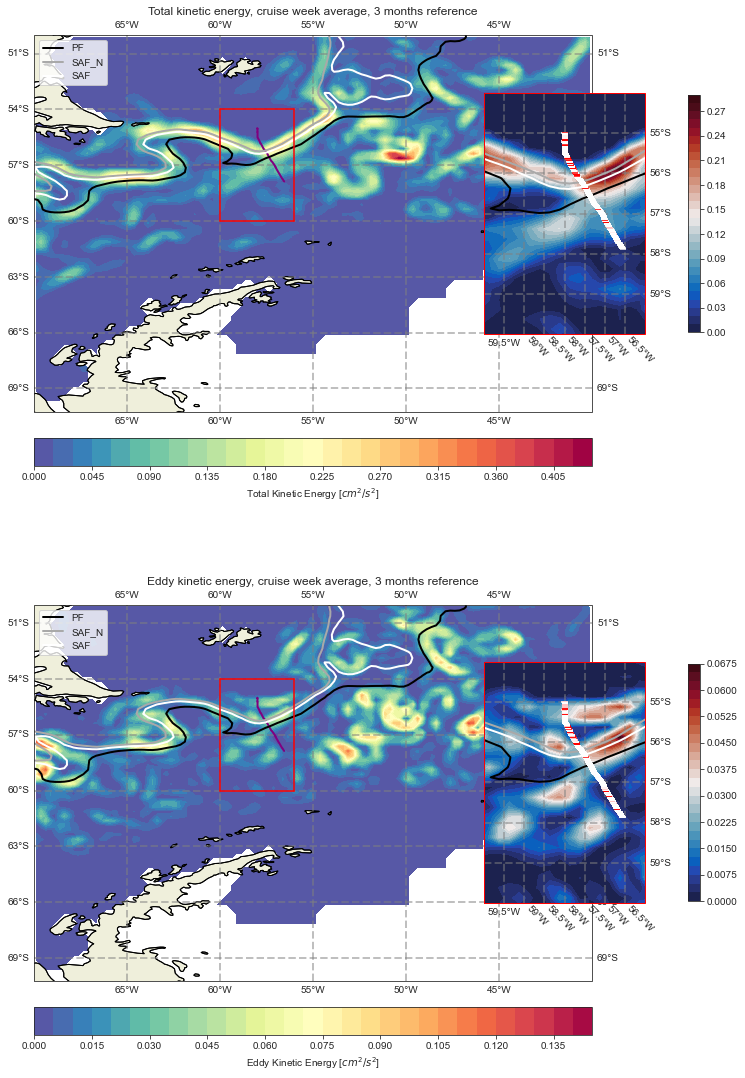

In [53]:
plot_KE(ds_ssh_drake_cruisemean, ds_TSG.lon, ds_TSG.lat,
     -60,-56,-60,-54, 
     savepath= 'results/analysis/orchestra_2/E-KE_cruise-mean_3months-reference.png',
     plot1_title='Total kinetic energy, cruise week average, 3 months reference', 
     plot2_title='Eddy kinetic energy, cruise week average, 3 months reference')

# MLD (from CTD casts)

## Load data

In [54]:
MLD = pd.read_pickle('data/04_models/tsg_orchestra_2/MLD.pkl')

In [55]:
ds_TSG.distance_cum.where(ds_TSG.lon == utils.utils.closest_value(ds_TSG.lon,-59.9998),drop=True)

<xarray.DataArray 'distance_cum' (distance_cum: 1)>
array([325500.])
Coordinates:
    lat           (distance_cum) float64 -55.21
    lon           (distance_cum) float64 -58.0
    depth         (distance_cum) float64 6.5
  * distance_cum  (distance_cum) float64 3.255e+05

In [56]:
MLD['distance_cum'] = np.cumsum(np.insert(gsw.distance(MLD.Longitude, MLD.Latitude),0,325500))

C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]


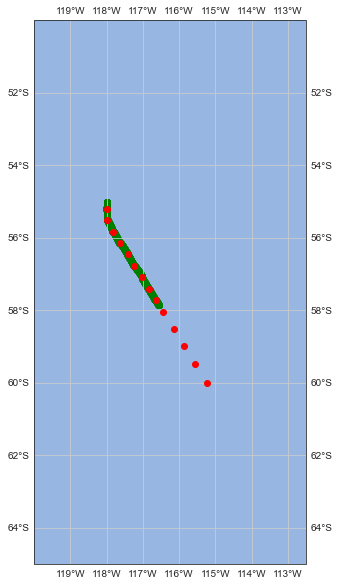

In [57]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-60))
ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
ax.set_extent([-60,-52.5,-65,-50], crs=ccrs.PlateCarree(central_longitude=-60))

ax.scatter(MLD['Longitude'],MLD['Latitude'], c='red', zorder=10)
ax.scatter(ds_TSG.lon, ds_TSG.lat, c='g')

# Figures

(100.0, 0.0)

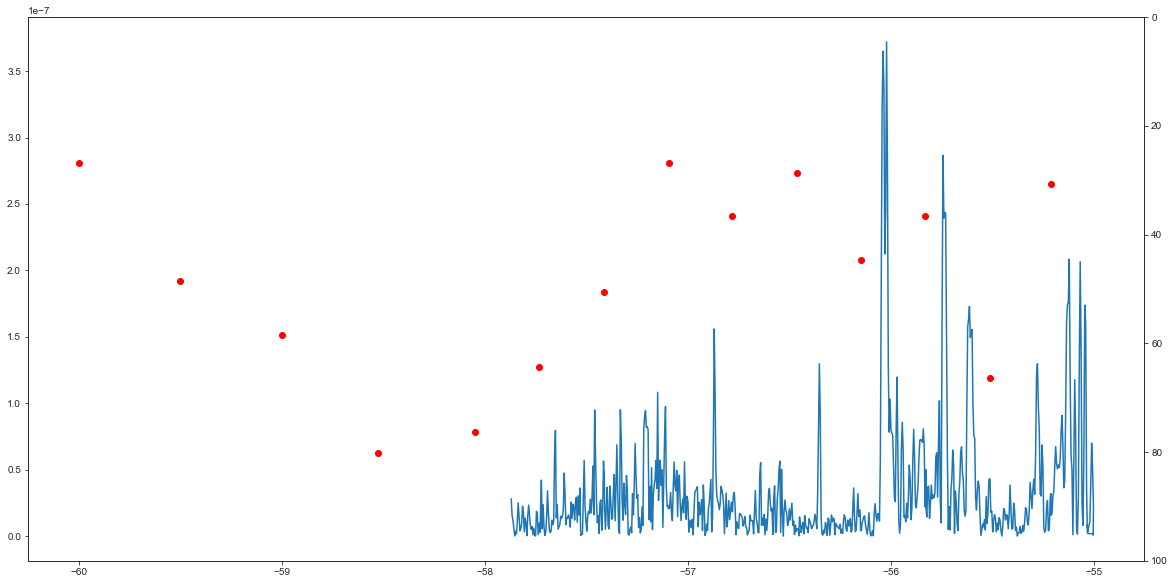

In [58]:
fig, ax0 = plt.subplots(figsize=(20,10))

ax1 = ax0.twinx()

ax0.plot(ds_TSG.lat, np.abs(ds_TSG.bx))
ax1.scatter(MLD.Latitude, MLD['MLD [m]'], c='r')
ax1.set_ylim(100,0)